## Notebook for inspection of datasets
Check of data after script application

In [11]:
# data loading
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats, integrate

%matplotlib inline
sns.set(color_codes=True)

path = '../datasets/'
dfrat     = pd.read_hdf(path+'relationalDatabase.h5', 'Rat_Behavior').set_index('index')
dfevent   = pd.read_hdf(path+'relationalDatabase.h5', 'Events').set_index('index')
dfsession = pd.read_hdf(path+'relationalDatabase.h5', 'Sessions').set_index('index')

dfratclean= pd.read_hdf(path+'filteredDatabase.h5', 'Rat_Behavior').set_index('index')
dfratvelocity= pd.read_hdf(path+'velocityDatabase.h5', 'Rat_Behavior').set_index('index')

In [7]:
dfratclean.head()

,Frame,Time,X_Pos,Y_Pos,Z_Pos,session_id,X_Ori,Y_Ori,Z_Ori
index,,,,,,,,,
143,143,0.595833,-0.067494,0.095215,-0.051606,0,-0.886022,0.124581,-0.425875
144,144,0.600000,-0.067405,0.095614,-0.051718,0,-0.885973,0.130530,-0.425575
145,145,0.604167,-0.067320,0.096008,-0.051826,0,-0.885878,0.136246,-0.425116
146,146,0.608333,-0.067240,0.096397,-0.051934,0,-0.885726,0.141832,-0.424598
147,147,0.612500,-0.067161,0.096774,-0.052030,0,-0.885525,0.146949,-0.423919


In [12]:
dfratvelocity.head()

,Frame,Time,X_Pos,Y_Pos,Z_Pos,session_id,X_Ori,Y_Ori,Z_Ori,dT,lVo,lx1,lz1,V1,V1_ori,lx1_ori,lz1_ori,theta,U,UM
index,,,,,,,,,,,,,,,,,,,,
0,145,0.604167,-0.067320,0.096008,-0.051826,0,-0.885878,0.136246,-0.425116,0.004167,399.932827,-0.901565,-0.432644,0.002457,0.982600,-360.565381,-173.028531,0.000379,5.216239,NaN
1,146,0.608333,-0.067240,0.096397,-0.051934,0,-0.885726,0.141832,-0.424598,0.004166,399.932827,-0.901742,-0.432276,0.002456,0.982239,-360.636049,-172.881191,0.000409,5.619484,NaN
2,147,0.612500,-0.067161,0.096774,-0.052030,0,-0.885525,0.146949,-0.423919,0.004167,399.932827,-0.901973,-0.431793,0.002455,0.981764,-360.728479,-172.688248,0.000535,7.355371,NaN
3,148,0.616667,-0.067087,0.097144,-0.052120,0,-0.885316,0.151729,-0.423101,0.004167,399.932827,-0.902258,-0.431198,0.002453,0.981223,-360.842412,-172.450051,0.000660,9.077926,NaN
4,149,0.620833,-0.067017,0.097504,-0.052203,0,-0.885108,0.156241,-0.422182,0.004166,399.932827,-0.902582,-0.430517,0.002452,0.980639,-360.972307,-172.177990,0.000754,10.367488,NaN


In [13]:
print(len(dfratclean.Time))
print(len(dfratvelocity.Time))

764396
760962


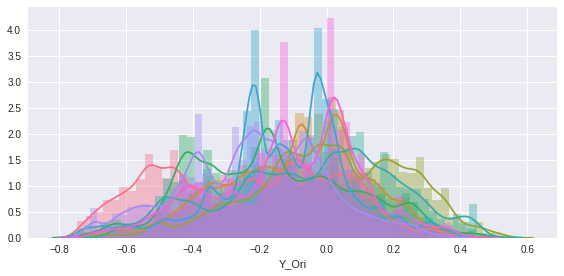

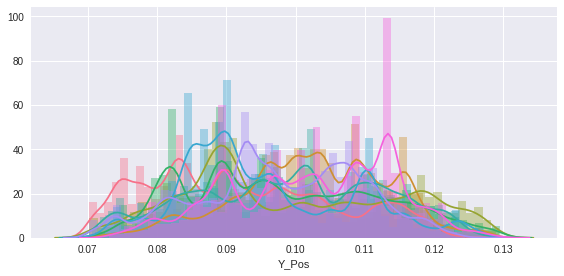

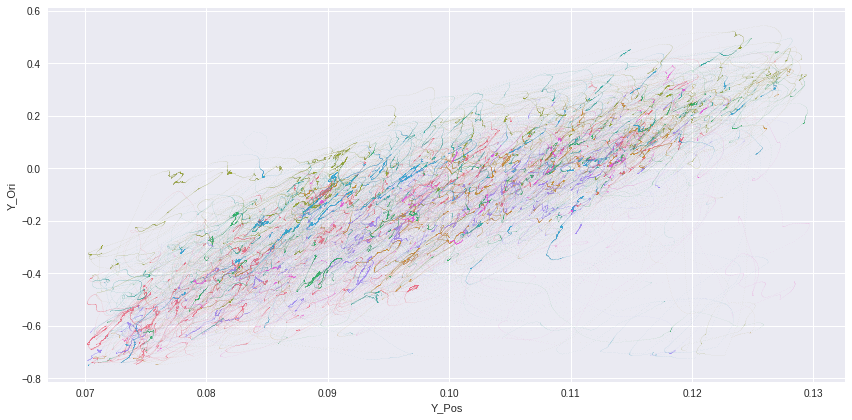

In [4]:
g = sns.FacetGrid(hue='session_id', data=dfratclean, size=4, aspect=2)#,hue_order=[0,1] )
g.map(sns.distplot, 'Y_Ori');

g = sns.FacetGrid(hue='session_id', data=dfratclean, size=4, aspect=2)#, hue_order=[0,1] )
g.map(sns.distplot, 'Y_Pos');

g = sns.FacetGrid( data=dfratclean, size=6, aspect=2, hue='session_id')
g.map(plt.scatter, "Y_Pos", "Y_Ori", alpha=0.1, s=0.1);

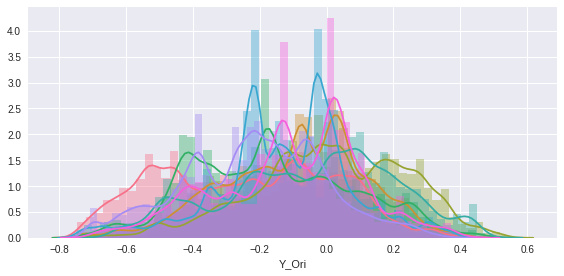

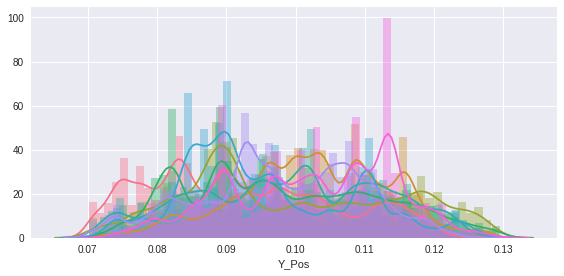

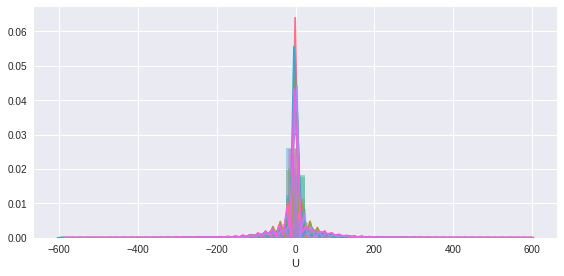

In [14]:
g = sns.FacetGrid(hue='session_id', data=dfratvelocity, size=4, aspect=2)#,hue_order=[0,1] )
g.map(sns.distplot, 'Y_Ori');

g = sns.FacetGrid(hue='session_id', data=dfratvelocity, size=4, aspect=2)#, hue_order=[0,1] )
g.map(sns.distplot, 'Y_Pos');

g = sns.FacetGrid(hue='session_id', data=dfratvelocity, size=4, aspect=2)#, hue_order=[0,1] )
g.map(sns.distplot, 'U');
